# Word vectors

In [1]:
# pip install spacy

In [2]:
# ! python -m spacy download en_core_web_lg

In [3]:
import spacy

nlp = spacy.load('en_core_web_lg')

In [4]:
doc = nlp("NLP is awesome")

In [5]:
doc

NLP is awesome

In [6]:
print(nlp.pipeline)

[('tagger', <spacy.pipeline.pipes.Tagger object at 0x0000021A6B524288>), ('parser', <spacy.pipeline.pipes.DependencyParser object at 0x0000021A6B41D168>), ('ner', <spacy.pipeline.pipes.EntityRecognizer object at 0x0000021A6B41D108>)]


In [7]:
for token in doc:
    print(token.text, token.pos_)

NLP PROPN
is AUX
awesome ADJ


In [8]:
doc[0]

NLP

In [9]:
doc[0].vector

array([-1.0566e-01,  3.7785e-01, -1.0228e-02,  4.5650e-01,  4.8863e-01,
        1.6889e-01,  1.4674e-01, -5.9620e-01,  6.7585e-01, -6.3618e-01,
       -5.0792e-01, -7.4938e-03, -1.7841e-01, -5.5094e-01,  2.6550e-01,
       -1.2943e-01, -2.5246e-01, -1.8112e-01, -2.2629e-01, -5.4580e-01,
        8.3134e-02,  4.8255e-01,  1.5798e-01, -1.4961e-01, -3.8963e-01,
        2.1353e-01,  3.8718e-01, -8.2669e-02,  4.7962e-02, -2.8362e-01,
       -1.2079e-02, -7.0894e-01,  2.7506e-01,  3.1675e-01,  3.1739e-01,
        4.1278e-01,  6.6155e-01,  2.5729e-01, -3.8667e-01, -3.1865e-01,
        2.2205e-01, -8.6112e-01, -4.4753e-01,  6.2978e-01,  4.1762e-01,
        3.5762e-01,  5.0012e-02,  2.0502e-02, -5.2038e-02, -6.0737e-01,
        1.6322e-01, -2.6724e-01, -2.8658e-01,  2.1772e-01, -5.1363e-02,
        5.1384e-01,  1.6027e-01,  1.2481e+00, -8.4226e-02, -1.7538e-01,
       -4.1476e-01,  2.7219e-01, -1.6987e-01, -1.0548e+00,  6.6929e-01,
        3.9349e-01,  2.0599e-01, -6.7270e-02, -5.0668e-01, -1.46

In [10]:
doc[0].vector.shape

(300,)

In [11]:
doc[0]

NLP

In [12]:
doc[0].similarity(nlp("apple"))

0.05982727695337134

In [13]:
def preprocess(word):
    return nlp(word) if type(word) == str else word

In [14]:
def similarity(word1, word2):
    word1_processed = preprocess(word1)
    word2_processed = preprocess(word2)

    return word1_processed.similarity(word2_processed)

In [15]:
similarity("apple", "iron")

0.23511307366163212

In [16]:
similarity("apple", "banana")

0.5831844567891399

In [17]:
similarity("apple", "tree")

0.3955672699610516

In [18]:
len(nlp.vocab)

495

In [19]:
def get_similar_words(word, n=5):
    word_processed = preprocess(word)

    return sorted([(w.text, word_processed.similarity(w)) for w in nlp.vocab if not w.text == word], key=lambda x: x[1], reverse=True)[:n]

In [20]:
get_similar_words("apple")

[('banana', 0.5831844722625306),
 ('tree', 0.3955672601326805),
 ('I', 0.33476121099748346),
 ('i', 0.33476121099748346),
 ('it', 0.330403315702624)]

In [21]:
get_similar_words("king")

[('He', 0.3972819693424268),
 ('he', 0.3972819693424268),
 ('r.', 0.351226396193153),
 ('Who', 0.33955761372373816),
 ('who', 0.33955761372373816)]

In [22]:
get_similar_words("cute")

[('awesome', 0.6223671770163095),
 (':)', 0.5428470505860964),
 ('^_^', 0.5381318386302708),
 ('=)', 0.5330863502093546),
 (';)', 0.4870031891715804)]

In [23]:
king = nlp.vocab["king"].vector
queen = nlp.vocab["queen"].vector
man = nlp.vocab["man"].vector

what_is_this = king - man + queen

what_is_this

array([ 8.98020029e-01, -7.84240007e-01,  6.66306973e-01, -5.88540018e-01,
       -5.75469017e-01, -9.40539956e-01,  6.75819993e-01, -1.22599006e+00,
       -6.89599991e-01,  1.47200108e-01, -1.49111986e-01, -7.91571021e-01,
        4.47683036e-02,  7.62818336e-01,  3.33853006e-01,  2.30411977e-01,
        7.73425996e-01,  8.72129917e-01, -5.66075027e-01,  3.12560022e-01,
       -2.74450004e-01,  1.75926995e+00, -1.38041496e+00, -4.75240014e-02,
       -1.35607004e+00,  2.12544024e-01, -1.02607000e+00,  6.87289983e-02,
       -8.94273996e-01,  1.37137294e+00,  2.38738000e-01,  1.11029994e+00,
        4.81199980e-01, -1.41599774e-03,  8.18599761e-02,  4.30319965e-01,
       -1.22448003e+00,  2.48399973e-02, -6.39430046e-01, -5.72379589e-01,
        1.54799998e-01, -9.98509973e-02, -5.09667993e-01, -1.78608984e-01,
        4.71149981e-01, -2.04167992e-01, -1.14127010e-01,  1.51343000e+00,
       -3.35630000e-01, -5.90391994e-01, -4.35409009e-01,  7.69719005e-01,
        2.23479003e-01, -

In [24]:
from scipy import spatial

def cosine_similarity(v, u):
    return 1 - spatial.distance.cosine(v, u)

similarities = {}

for word in nlp.vocab:
    if word.is_alpha:
        similarities[word.text] = cosine_similarity(what_is_this, word.vector)



In [25]:
sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:5]

[('queen', 0.8452084064483643),
 ('king', 0.7803477048873901),
 ('iron', 0.19357843697071075),
 ('apple', 0.1696002185344696),
 ('ll', 0.1684713512659073)]

## Visualizing word vectors

In [26]:
nlp.vocab.vectors.data.shape

(684831, 300)

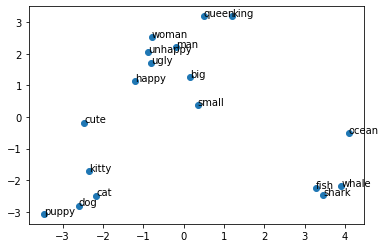

In [27]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

WORDS = ["happy", "unhappy", "cute", "ugly", "big", "small", "king", "man", "queen", "woman", "puppy", "dog", "kitty", "cat", "whale", "shark", "fish", "ocean"]

data = []
data_annotation = []

for v in nlp.vocab.vectors:
    word = nlp.vocab[v]

    if word in WORDS:
        data.append(word.vector)
        data_annotation.append(word.lower_)
#data = np.array([word.vector for word in nlp.vocab if word.lower_ in WORDS])


pca = PCA(n_components=2)
reduced_dims = pca.fit_transform(data)

fig, ax = plt.subplots()
ax.scatter(reduced_dims[:, 0], reduced_dims[:, 1])

vocabulary = list(nlp.vocab.strings)

for i in range(len(data)):
    ax.annotate(data_annotation[i], (reduced_dims[i, 0], reduced_dims[i, 1]))